<a href="https://colab.research.google.com/github/shaviram99/DA-Portofolio/blob/main/Customer_Segmentation_for_mutual_fund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

**Bussines Background**

an Indonesian investment platform startup currently focused on app-based mutual fund investment at the end of September 2021. In the mobile app developed by the company, users can register as investors and conduct buy or sell transactions on selected mutual funds. In addition, the platform offers robo-investing, which allows users to invest in a diversified mutual fund portfolio without hassle while considering the factors such as age, income, and overall risk profile.
 
 
Mutual funds (Indonesian: reksadana) is a professionally managed investment fund that pools money from many investors, to be invested by the fund manager to gain returns. The value of mutual funds changes as the value of the underlying investment changes. Mutual fund investors can profit from buying mutual funds when the unit price is low and sell them at a higher price (and lose if the reverse happens).

**Objective**

In the second week of October, the company is set to expand into government bond investment products, **in addition to its existing mutual fund products**. The marketing and sales team would like to run a thematic communication campaign for the upcoming product but want to tailor the campaign to a few different relevant segments. As a data analyst, you’re tasked to provide **segmentation for this purpose and give communication recommendations for the themes of the campaign.**

# **Import Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime
import plotly.express as px

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler  # Transform features by scaling each feature to a given range  #Sensitive with outlier, scaling using Min (0) and Max (1), Result between range 0 and 1
from sklearn.preprocessing import StandardScaler# Transform features by scaling each feature to a given range  #Standard deviation, count range from mean to standard deviation
from sklearn.preprocessing import RobustScaler  # Transform features by scaling each feature to a given range  #If there is any outlier we can use RobustScaler
from sklearn import cluster                     # library that contains algorithms for segmenting
# from silhoutte import silhoutte_analysis        # used to study the separation distance between the resulting clusters

#**Load Datasets**

##**I. Users Dataset**



1.   user_id = Client ID on the platform
2.   registration_import_datetime = Registration time and date at UTC+7 timezone (WIB)
3. user_gender = User self-identified gender
4. user_age = User self-identified age
5. user_occupation = User self-identified job
6. user_income_range = User self-identified income range
7. referral_code_used = If user enter referral code during registration, the value is "used referral"; else will be Null valued
8. user_income_source = User self-declared source of income

In [ ]:
user_url = 'https://docs.google.com/spreadsheets/d/1gEBZRe8NZLGMFK1BM522X8oM-2QU3PI-yIufTQmZh8w/edit#gid=1864972267'
user_url_trf = user_url.replace('/edit#gid=', '/export?format=csv&gid=')
user_url_trf


'https://docs.google.com/spreadsheets/d/1gEBZRe8NZLGMFK1BM522X8oM-2QU3PI-yIufTQmZh8w/export?format=csv&gid=1864972267'

In [ ]:
# Load Users Dataset
df_user = pd.read_csv(user_url_trf)

# To get the Users Dataset Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB




user dataset info:
*   there are 14712 rows and 8 coloums
*   data type registration_import_datetime is object, change to timestamp






## **II. Daily User Balance Sept 21 Dataset**

**Data Dictionary**
1. user_id = Client ID on the platform
2. date = Date of the user balance
3. Saham_AUM = AUM of equity mutual fund held by client to date
4. Saham_invested_amount = The total price paid by client to buy equity mutual fund to date.
5. Saham_transaction_amount = Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
6. Pasar_Uang_AUM = AUM of money market mutual fund held by client to date
7. Pasar_Uang_invested_amount = The total price paid by client to buy money market mutual fund to date
8. Pasar_Uang_transaction_amount = Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
9. Pendapatan_Tetap_AUM = AUM of fixed income mutual fund held by client to date
10. Pendapatan_Tetap_invested_amount = The total price paid by client to buy fixed income mutual fund to date
11. Pendapatan_Tetap_transaction_amount = Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
12. Campuran_AUM = AUM of mixed mutual fund held by client to date
13. Campuran_invested_amount = The total price paid by client to buy mixed mutual fund to date
14. Campuran_transaction_amount' = Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

In [ ]:
balance_url = 'https://docs.google.com/spreadsheets/d/1xgo_1zSoO-H08wNzU7EqeelX96hsHwqRV2dqIOIRMms/edit#gid=37476364'
balance_url_trf = balance_url.replace('/edit#gid=', '/export?format=csv&gid=')
balance_url_trf

'https://docs.google.com/spreadsheets/d/1xgo_1zSoO-H08wNzU7EqeelX96hsHwqRV2dqIOIRMms/export?format=csv&gid=37476364'

In [ ]:
# Load Users Dataset
df_balance = pd.read_csv(balance_url_trf)

# To get the Users Dataset Info
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

Daily user balance sept21 info:
1. there are 158811 rows and 13 columns
2. There are 2 data type that do not match (user_id and date)

# **Data Cleaning**

##**I. Removing Duplicates**

There was no duplicate found

###**I. Users Dataset**

In [ ]:
# to check duplicated data
df_user.duplicated().sum()

0

###**II. Daily User Balance Dataset**

In [ ]:
# to check duplicated data
df_balance.duplicated().sum()

0

##**II. Removing Irrelevant Value**

###**I. Users Dataset**

In [ ]:
# To get the Users Dataset Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
#Check typos
for i in df_user.columns:
  unique_data = df_user[i].value_counts()
  print(unique_data,'\n')

2616977    1
4297940    1
4267551    1
4407058    1
4270595    1
          ..
3771510    1
3847659    1
3763751    1
3878306    1
4457305    1
Name: user_id, Length: 14712, dtype: int64 

2021-08-05 10:18:13    5
2021-09-17 16:41:06    5
2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
2021-09-19 18:40:26    5
                      ..
2021-09-26 02:41:10    1
2021-10-02 08:27:19    1
2021-09-22 15:20:13    1
2021-09-29 00:04:18    1
2021-10-27 12:35:23    1
Name: registration_import_datetime, Length: 11536, dtype: int64 

Male      8977
Female    5735
Name: user_gender, dtype: int64 

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47


Summary:
1. there are missing value in referral_code_used
2. no typo found

###**II. Daily User Balance Dataset**

In [ ]:
# To get the Users Dataset Info
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
#Check typos
for i in df_balance.columns:
  unique_data = df_balance[i].value_counts()
  print(unique_data,'\n')

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64 

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name

Summary:
there is no typos

##**III. Handling Missing Value**

###**I. Users Dataset**

In [ ]:
# to check missing values
df_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [ ]:
# fill missing value with 'No'
df_user['referral_code_used'] = df_user['referral_code_used'].fillna('No')
df_user.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
dtype: int64

In [ ]:
# To see all in referral code used
df_user['referral_code_used'].value_counts()

No               9108
used referral    5604
Name: referral_code_used, dtype: int64

###**II. Daily User Balance Dataset**

In [ ]:
# to check missing values
df_balance.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
# fill missing value with zero
df_balance = df_balance.fillna(0)
df_balance.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

##**IV. String Manipulation**

###**I. Users Dataset**

In [ ]:
#To see dataset user
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,2616977,2021-08-01 00:11:14,Male,18,Pelajar,< 10 Juta,No,Gaji
1,3731655,2021-08-01 00:34:41,Male,36,Swasta,Rp 10 Juta - 50 Juta,No,Gaji
2,3731619,2021-08-01 00:46:12,Male,34,Swasta,Rp 10 Juta - 50 Juta,No,Gaji
3,3731618,2021-08-01 00:57:12,Female,41,Swasta,> Rp 100 Juta - 500 Juta,used referral,Dari Orang Tua / Anak
4,3732132,2021-08-01 02:38:40,Male,42,Swasta,> Rp 50 Juta - 100 Juta,No,Gaji


In [ ]:
# to change format date
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])
df_user['registration_import_datetime'] = df_user['registration_import_datetime'].dt.strftime('%Y-%m-%d')

df_user['registration_import_datetime'].value_counts()


2021-10-17    272
2021-08-29    267
2021-09-26    258
2021-10-07    247
2021-10-04    247
             ... 
2021-08-14    113
2021-08-21    110
2021-08-17    110
2021-10-16     61
2021-10-27     44
Name: registration_import_datetime, Length: 87, dtype: int64

Summary:
1. Change date format in column 'registration_import_datetime' to '%Y-%m-%d' format

###**II. Daily User Balance Dataset**

In [ ]:
#To see dataset user
df_balance.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0


In [ ]:
#to change column name 'date' to 'date_transaction
df_balance.rename(columns = {'date' : 'date_transaction'}, inplace=True)
df_balance.head()

,user_id,date_transaction,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0


Summary:
1. change column name 'date' to 'date_transaction' to avoid confusion

##**V. Convert Datatype**

Summary:
1. in user dataset: change datatype column 'user_id' from  int to string and change datatype column 'registration_import_datetime' from str to datetime
2. in balance dataset: change datatype column 'user_id' from  int to string and change datatype column 'date_transaction' from str to datetime

### **I. Users Dataset**

In [ ]:
# To get the dataset Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
# Convert data type from data frame 

# Convert user_id from Int to String
df_user['user_id'] = df_user['user_id'].astype(str) 

# Convert registration_import_datetime data types to datetime
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


###**II. Daily User Balance Dataset**

In [ ]:
# To get the dataset Info
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date_transaction                     158811 non-null  object 
 2   Saham_AUM                            158811 non-null  float64
 3   Saham_invested_amount                158811 non-null  float64
 4   Saham_transaction_amount             158811 non-null  float64
 5   Pasar_Uang_AUM                       158811 non-null  float64
 6   Pasar_Uang_invested_amount           158811 non-null  float64
 7   Pasar_Uang_transaction_amount        158811 non-null  float64
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  158811 non-null  float64
 11  Campuran_AUM 

In [ ]:
# Convert data type from data frame 

# Convert user_id from Int to String
df_balance['user_id'] = df_balance['user_id'].astype(str) 

# Convert date data types to datetime
df_balance['date_transaction'] = pd.to_datetime(df_balance['date_transaction'])

# Convert date data float to int
df_balance['Saham_AUM'] = df_balance['Saham_AUM'].astype(int)
df_balance['Saham_invested_amount'] = df_balance['Saham_invested_amount'].astype(int)
df_balance['Saham_transaction_amount'] = df_balance['Saham_transaction_amount'].astype(int)
df_balance['Pasar_Uang_AUM'] = df_balance['Pasar_Uang_AUM'].astype(int)
df_balance['Pasar_Uang_invested_amount'] = df_balance['Pasar_Uang_invested_amount'].astype(int)
df_balance['Pasar_Uang_transaction_amount'] = df_balance['Pasar_Uang_transaction_amount'].astype(int)
df_balance['Pendapatan_Tetap_AUM'] = df_balance['Pendapatan_Tetap_AUM'].astype(int)
df_balance['Pendapatan_Tetap_invested_amount'] = df_balance['Pendapatan_Tetap_invested_amount'].astype(int)
df_balance['Pendapatan_Tetap_transaction_amount'] = df_balance['Pendapatan_Tetap_transaction_amount'].astype(int)
df_balance['Campuran_AUM'] = df_balance['Campuran_AUM'].astype(int)
df_balance['Campuran_invested_amount'] = df_balance['Campuran_invested_amount'].astype(int)
df_balance['Campuran_transaction_amount'] = df_balance['Campuran_transaction_amount'].astype(int)

df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date_transaction                     158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

##**VI. Handling Outlier**

### **I. User Dataset**

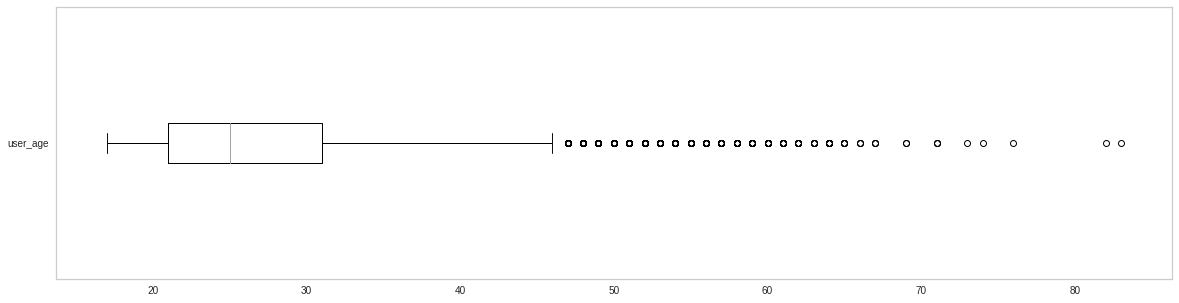

In [ ]:
# Creat boxplot to see outlier 
df_user.boxplot(column=['user_age'], fontsize=10, rot=0, grid=False, figsize=(20,5), vert=False)

too many outlier >> can't drop all of them

In [ ]:
df_user_outlier = df_user.copy()
#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1user = df_user_outlier['user_age'].quantile(0.25)
Q3user = df_user_outlier['user_age'].quantile(0.75)

IQRuser = Q3user - Q1user
lower_fence_user = Q1user - 1.5 * IQRuser
upper_fence_user = Q3user + 1.5 * IQRuser

print('Q1:', Q1user)
print('Q3:', Q3user)
print('IQR:', IQRuser)
print('Lower Fence:', lower_fence_user)
print('Upper Fence:', upper_fence_user)

Q1: 21.0
Q3: 31.0
IQR: 10.0
Lower Fence: 6.0
Upper Fence: 46.0


In [ ]:
#to know percentage of outlier
df_user_begin = len(df_user_outlier)
age_outlier = len(df_user_outlier[(df_user_outlier['user_age']<lower_fence_user) | (df_user_outlier['user_age']>upper_fence_user)])

print('Data before remove outlier: ', df_user_begin)
print('Number of outlier: ', age_outlier)
print('Percentage of outlier: ', round(age_outlier/df_user_begin*100,2), '%')

Data before remove outlier:  14712
Number of outlier:  652
Percentage of outlier:  4.43 %


we got the percentage of outlier is 4.43%, this is a small number of percentage so drop the outlier

In [ ]:
user_lower_out = df_user_outlier['user_age']<lower_fence_user
user_upper_out = df_user_outlier['user_age']>upper_fence_user
df_user_outlier = df_user_outlier.loc[~(user_lower_out | user_upper_out)]

df_user_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14060 non-null  object        
 1   registration_import_datetime  14060 non-null  datetime64[ns]
 2   user_gender                   14060 non-null  object        
 3   user_age                      14060 non-null  int64         
 4   user_occupation               14060 non-null  object        
 5   user_income_range             14060 non-null  object        
 6   referral_code_used            14060 non-null  object        
 7   user_income_source            14060 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 988.6+ KB


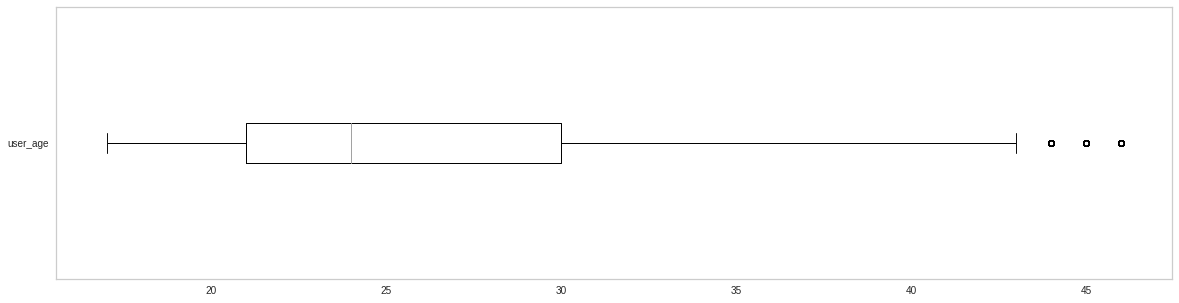

In [ ]:
# boxplot clean data
df_user_outlier.boxplot(column=['user_age'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)

###**II. Daily User Balance Dataset**

In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date_transaction                     158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

####**Saham_transaction_amount**

In [ ]:
#data without zero value
df_saham = df_balance[df_balance['Saham_transaction_amount'] != 0]

#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1saham = df_saham['Saham_transaction_amount'].quantile(0.25)
Q3saham = df_saham['Saham_transaction_amount'].quantile(0.75)

IQRsaham = Q3saham - Q1saham
lower_fence_s = Q1saham - 1.5 * IQRsaham
upper_fence_s = Q3saham + 1.5 * IQRsaham

print('Q1:', Q1saham)
print('Q3:', Q3saham)
print('IQR:', IQRsaham)
print('Lower Fence:', lower_fence_s)
print('Upper Fence:', upper_fence_s)


Q1: -40000.0
Q3: 150110.0
IQR: 190110.0
Lower Fence: -325165.0
Upper Fence: 435275.0


In [ ]:
#to know percentage of outlier
df_saham_begin = len(df_saham)
outlier_sahamtx = len(df_saham[(df_saham['Saham_transaction_amount']<lower_fence_s) | (df_saham['Saham_transaction_amount']>upper_fence_s)])

print('Data before remove outlier: ', df_saham_begin)
print('Number of outlier: ', outlier_sahamtx)
print('Percentage of outlier: ', round(outlier_sahamtx/df_saham_begin*100,2), '%')

Data before remove outlier:  5279
Number of outlier:  987
Percentage of outlier:  18.7 %


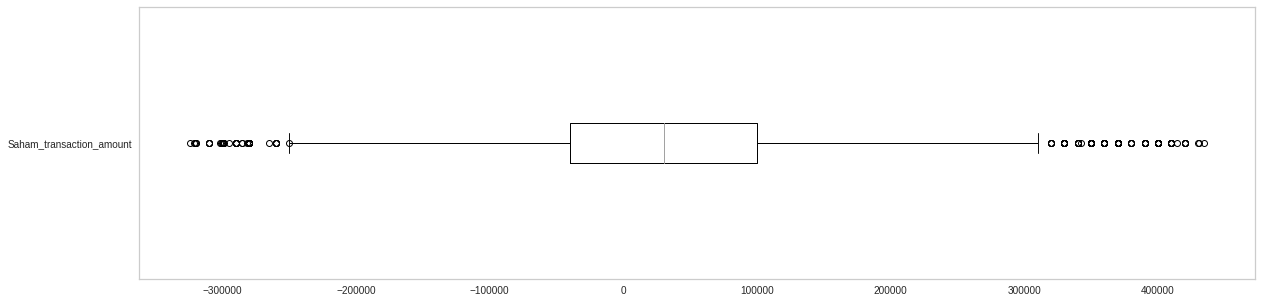

In [ ]:
df_saham_1 = df_saham.copy()

df_saham_1 = df_saham_1[(df_saham_1['Saham_transaction_amount']>=lower_fence_s) & (df_saham_1['Saham_transaction_amount']<=upper_fence_s)]
# boxplot clean data
df_saham_1.boxplot(column=['Saham_transaction_amount'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)

the percentage of saham outlier too large, so there is no outlier remove

####**Pasar_Uang_transaction_amount**

In [ ]:
#data without zero value
df_psuang = df_balance[df_balance['Pasar_Uang_transaction_amount'] != 0]

#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1pu = df_psuang['Pasar_Uang_transaction_amount'].quantile(0.25)
Q3pu = df_psuang['Pasar_Uang_transaction_amount'].quantile(0.75)

IQRpu = Q3pu - Q1pu
lower_fence_pu = Q1pu - 1.5 * IQRpu
upper_fence_pu = Q3pu + 1.5 * IQRpu

print('Q1:', Q1pu)
print('Q3:', Q3pu)
print('IQR:', IQRpu)
print('Lower Fence:', lower_fence_pu)
print('Upper Fence:', upper_fence_pu)


Q1: -10000.0
Q3: 100000.0
IQR: 110000.0
Lower Fence: -175000.0
Upper Fence: 265000.0


In [ ]:
#to know percentage of outlier
df_psuang_begin = len(df_psuang)
outlier_psuang = len(df_psuang[(df_psuang['Pasar_Uang_transaction_amount']<lower_fence_pu) | (df_psuang['Pasar_Uang_transaction_amount']>upper_fence_pu)])

print('Data before remove outlier: ', df_psuang_begin)
print('Number of outlier: ', outlier_psuang)
print('Percentage of outlier: ', round(outlier_psuang/df_psuang_begin*100,2), '%')

Data before remove outlier:  6436
Number of outlier:  1358
Percentage of outlier:  21.1 %


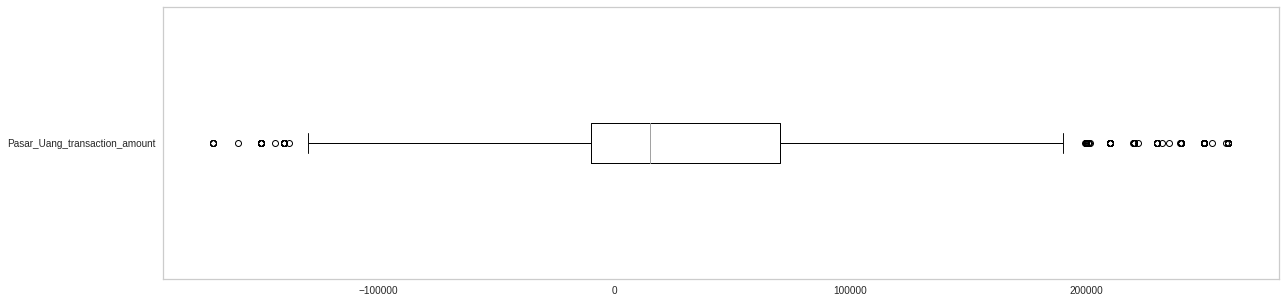

In [ ]:
df_psuang_1 = df_psuang.copy()

df_psuang_1 = df_psuang_1[(df_psuang_1['Pasar_Uang_transaction_amount']>=lower_fence_pu) & (df_psuang_1['Pasar_Uang_transaction_amount']<=upper_fence_pu)]
# boxplot clean data
df_psuang_1.boxplot(column=['Pasar_Uang_transaction_amount'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)

the percentage of Pasar Uang outlier too large, so there is no outlier remove

####**Pendapatan_Tetap_transaction_amount**

In [ ]:
#data without zero value
df_pt_tx = df_balance[df_balance['Pendapatan_Tetap_transaction_amount'] != 0]

#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1pt = df_pt_tx['Pendapatan_Tetap_transaction_amount'].quantile(0.25)
Q3pt = df_pt_tx['Pendapatan_Tetap_transaction_amount'].quantile(0.75)

IQRpt = Q3pt - Q1pt
lower_fence_pt = Q1pt - 1.5 * IQRpt
upper_fence_pt = Q3pt + 1.5 * IQRpt

print('Q1:', Q1pt)
print('Q3:', Q3pt)
print('IQR:', IQRpt)
print('Lower Fence:', lower_fence_pt)
print('Upper Fence:', upper_fence_pt)


Q1: -20000.0
Q3: 170000.0
IQR: 190000.0
Lower Fence: -305000.0
Upper Fence: 455000.0


In [ ]:
#to know percentage of outlier
df_pt_tx_begin = len(df_pt_tx)
outlier_pt_tx = len(df_pt_tx[(df_pt_tx['Pendapatan_Tetap_transaction_amount']<lower_fence_pt) | (df_pt_tx['Pendapatan_Tetap_transaction_amount']>upper_fence_pt)])

print('Data before remove outlier: ', df_pt_tx_begin)
print('Number of outlier: ', outlier_pt_tx)
print('Percentage of outlier: ', round(outlier_pt_tx/df_pt_tx_begin*100,2), '%')

Data before remove outlier:  5667
Number of outlier:  1012
Percentage of outlier:  17.86 %


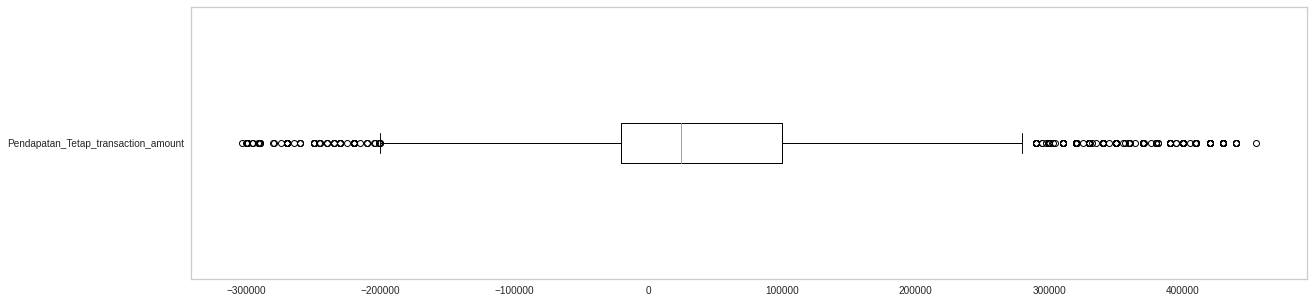

In [ ]:
df_pt_tx_1 = df_pt_tx.copy()

df_pt_tx_1 = df_pt_tx_1[(df_pt_tx_1['Pendapatan_Tetap_transaction_amount']>=lower_fence_pt) & (df_pt_tx_1['Pendapatan_Tetap_transaction_amount']<=upper_fence_pt)]
# boxplot clean data
df_pt_tx_1.boxplot(column=['Pendapatan_Tetap_transaction_amount'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)

the percentage of Pendapatan Tetap outlier too large, so there is no outlier remove

####**Campuran_transaction_amount**

In [ ]:
#data without zero value
df_cam_tx = df_balance[df_balance['Campuran_transaction_amount'] != 0]

#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1cam = df_cam_tx['Campuran_transaction_amount'].quantile(0.25)
Q3cam = df_cam_tx['Campuran_transaction_amount'].quantile(0.75)

IQRcam = Q3cam - Q1cam
lower_fence_cam = Q1cam - 1.5 * IQRcam
upper_fence_cam = Q3cam + 1.5 * IQRcam

print('Q1:', Q1cam)
print('Q3:', Q3cam)
print('IQR:', IQRcam)
print('Lower Fence:', lower_fence_cam)
print('Upper Fence:', upper_fence_cam)


Q1: -100000.0
Q3: 2000000.0
IQR: 2100000.0
Lower Fence: -3250000.0
Upper Fence: 5150000.0


In [ ]:
#to know percentage of outlier
df_cam_tx_begin = len(df_cam_tx)
outlier_cam_tx = len(df_cam_tx[(df_cam_tx['Campuran_transaction_amount']<lower_fence_cam) | (df_cam_tx['Campuran_transaction_amount']>upper_fence_cam)])

print('Data before remove outlier: ', df_cam_tx_begin)
print('Number of outlier: ', outlier_cam_tx)
print('Percentage of outlier: ', round(outlier_cam_tx/df_cam_tx_begin*100,2), '%')

Data before remove outlier:  177
Number of outlier:  39
Percentage of outlier:  22.03 %


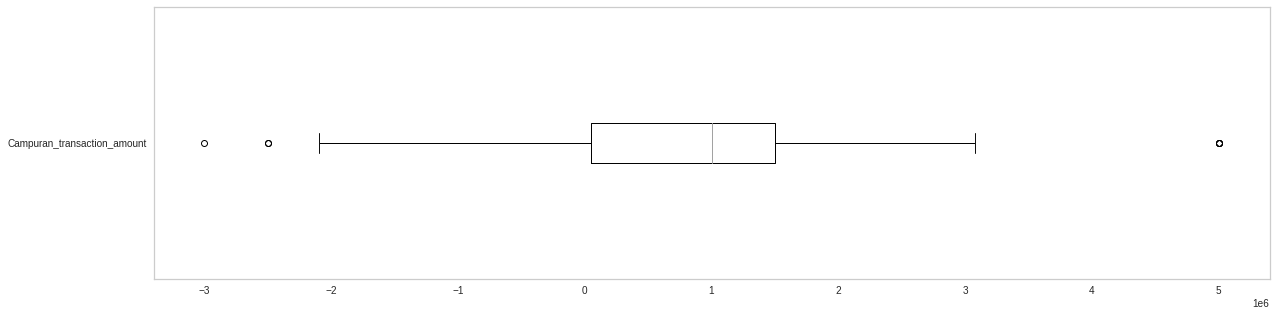

In [ ]:
df_cam_tx_1 = df_cam_tx.copy()

df_cam_tx_1 = df_cam_tx_1[(df_cam_tx_1['Campuran_transaction_amount']>=lower_fence_cam) & (df_cam_tx_1['Campuran_transaction_amount']<=upper_fence_cam)]
# boxplot clean data
df_cam_tx_1.boxplot(column=['Campuran_transaction_amount'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)

the percentage of Campuran outlier too large, so there is no outlier remove

##**VII. Combine Dataset**

In [ ]:
# Merge dataset
df_clean = pd.merge(df_user_outlier, df_balance, on='user_id', how = 'right', indicator = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         151541 non-null  datetime64[ns]
 2   user_gender                          151541 non-null  object        
 3   user_age                             151541 non-null  float64       
 4   user_occupation                      151541 non-null  object        
 5   user_income_range                    151541 non-null  object        
 6   referral_code_used                   151541 non-null  object        
 7   user_income_source                   151541 non-null  object        
 8   date_transaction                     158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  int64         
 

In [ ]:
df_clean._merge.value_counts()

both          151541
right_only      7270
left_only          0
Name: _merge, dtype: int64

**Summary**:
left: df_user
right : df_balance
merge dataset with right merge because there are data transaction in df balance.

In [ ]:
#to check missing value
df_clean.isna().sum()

user_id                                   0
registration_import_datetime           7270
user_gender                            7270
user_age                               7270
user_occupation                        7270
user_income_range                      7270
referral_code_used                     7270
user_income_source                     7270
date_transaction                          0
Saham_AUM                                 0
Saham_invested_amount                     0
Saham_transaction_amount                  0
Pasar_Uang_AUM                            0
Pasar_Uang_invested_amount                0
Pasar_Uang_transaction_amount             0
Pendapatan_Tetap_AUM                      0
Pendapatan_Tetap_invested_amount          0
Pendapatan_Tetap_transaction_amount       0
Campuran_AUM                              0
Campuran_invested_amount                  0
Campuran_transaction_amount               0
_merge                                    0
dtype: int64

In [ ]:
print('Missing value combine datasets: ', 7270/158811*100,'%')

Missing value combine datasets:  4.577768542481314 %


In [ ]:
#drop missing value
df_clean1 = df_clean.copy()
df_clean1.dropna(inplace = True)
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              151541 non-null  object        
 1   registration_import_datetime         151541 non-null  datetime64[ns]
 2   user_gender                          151541 non-null  object        
 3   user_age                             151541 non-null  float64       
 4   user_occupation                      151541 non-null  object        
 5   user_income_range                    151541 non-null  object        
 6   referral_code_used                   151541 non-null  object        
 7   user_income_source                   151541 non-null  object        
 8   date_transaction                     151541 non-null  datetime64[ns]
 9   Saham_AUM                            151541 non-null  int64         
 

In [ ]:
# to check duplicated data
df_clean1.duplicated().sum()

0

**extract sell/buy/freq for daily transaction**

In [ ]:
df_daily = df_clean1.copy()

In [ ]:
df_daily ['saham_buy']  = df_daily['Saham_transaction_amount'].apply(lambda x: x if x > 0 else 0) #extract buy from transaction column
df_daily ['saham_sell'] = df_daily['Saham_transaction_amount'].apply(lambda x: -x if x < 0 else 0) #extract sell from transaction column
df_daily ['net_saham'] = df_daily['saham_buy'] - df_daily['saham_sell']
df_daily ['saham_frequency'] = df_daily['Saham_transaction_amount'].apply(lambda x: x if x == 0 else 1) #extract frequency from transaction column
df_daily ['pu_buy'] = df_daily['Pasar_Uang_transaction_amount'].apply(lambda x: x if x > 0 else 0) #extract buy from transaction column
df_daily ['pu_sell'] = df_daily['Pasar_Uang_transaction_amount'].apply(lambda x: -x if x < 0 else 0) #extract sell from transaction column
df_daily ['net_pu'] = df_daily['pu_buy'] - df_daily['pu_sell']
df_daily ['pu_frequency'] = df_daily['Pasar_Uang_transaction_amount'].apply(lambda x: x if x == 0 else 1) #extract frequency from transaction column
df_daily ['pt_buy'] = df_daily['Pendapatan_Tetap_transaction_amount'].apply(lambda x: x if x > 0 else 0) #extract buy from transaction column
df_daily ['pt_sell'] = df_daily['Pendapatan_Tetap_transaction_amount'].apply(lambda x: -x if x < 0 else 0) #extract sell from transaction column
df_daily ['net_pt'] = df_daily['pt_buy'] - df_daily['pt_sell']
df_daily ['pt_frequency'] = df_daily['Pendapatan_Tetap_transaction_amount'].apply(lambda x: x if x == 0 else 1) #extract frequency from transaction column
df_daily ['campur_buy'] = df_daily['Campuran_transaction_amount'].apply(lambda x: x if x > 0 else 0) #extract buy from transaction column
df_daily ['campur_sell'] = df_daily['Campuran_transaction_amount'].apply(lambda x: -x if x < 0 else 0) #extract sell from transaction column
df_daily ['net_campur'] = df_daily['campur_buy'] - df_daily['campur_sell']
df_daily ['campur_frequency'] = df_daily['Campuran_transaction_amount'].apply(lambda x: x if x == 0 else 1) #extract frequency from transaction column,
                         
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              151541 non-null  object        
 1   registration_import_datetime         151541 non-null  datetime64[ns]
 2   user_gender                          151541 non-null  object        
 3   user_age                             151541 non-null  float64       
 4   user_occupation                      151541 non-null  object        
 5   user_income_range                    151541 non-null  object        
 6   referral_code_used                   151541 non-null  object        
 7   user_income_source                   151541 non-null  object        
 8   date_transaction                     151541 non-null  datetime64[ns]
 9   Saham_AUM                            151541 non-null  int64         
 

In [ ]:
#drop column transaction
df_daily.drop(columns= ['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount'],inplace=True)

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

In [ ]:
#rearrange column
df_daily = df_daily[['user_id', 'registration_import_datetime', 'user_gender', 'user_age', 'user_occupation', 'user_income_range','referral_code_used', 'user_income_source', 'date_transaction',
                      'Saham_AUM', 'Saham_invested_amount', 'saham_buy', 'saham_sell', 'net_saham','saham_frequency',
                      'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount', 'pu_buy', 'pu_sell', 'net_pu','pu_frequency',
                      'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount', 'pt_buy', 'pt_sell', 'net_pt','pt_frequency',
                      'Campuran_AUM', 'Campuran_invested_amount', 'campur_buy', 'campur_sell', 'net_campur','campur_frequency',                             
                      ]]
df_daily.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

In [ ]:
# to check missing values
df_daily.isna().sum()

user_id                             0
registration_import_datetime        0
user_gender                         0
user_age                            0
user_occupation                     0
user_income_range                   0
referral_code_used                  0
user_income_source                  0
date_transaction                    0
Saham_AUM                           0
Saham_invested_amount               0
saham_buy                           0
saham_sell                          0
net_saham                           0
saham_frequency                     0
Pasar_Uang_AUM                      0
Pasar_Uang_invested_amount          0
pu_buy                              0
pu_sell                             0
net_pu                              0
pu_frequency                        0
Pendapatan_Tetap_AUM                0
Pendapatan_Tetap_invested_amount    0
pt_buy                              0
pt_sell                             0
net_pt                              0
pt_frequency

#**Transform to Monthly**

##**end-of-period AUM**

In [ ]:
df1 = df_daily.copy()

In [ ]:
aum = ['user_id','date_transaction','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']
df_aum = df1[aum]
df_aum

,user_id,date_transaction,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
0,50701,2021-08-30,0,0,0,10132277
1,50701,2021-08-31,0,0,0,10206945
2,50701,2021-09-01,0,0,0,9956556
3,50701,2021-09-02,0,0,0,9914858
4,50701,2021-09-03,0,0,0,10016360
...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0
158807,4165132,2021-09-30,0,10001,0,0
158808,4165630,2021-09-30,41625,10001,49869,0
158809,4165704,2021-09-30,0,0,9987,0


In [ ]:
# to know aum value in the end of the month in every user_id
df_aum = df_aum.groupby([df_aum['user_id'], df_aum['date_transaction'].dt.year, df_aum['date_transaction'].dt.month], as_index=False).last()
df_aum.columns = ['user_id', 'month', 'Saham_AUM_end','Pasar_Uang_AUM_end','Pendapatan_Tetap_AUM_end','Campuran_AUM_end']
df_aum

,user_id,month,Saham_AUM_end,Pasar_Uang_AUM_end,Pendapatan_Tetap_AUM_end,Campuran_AUM_end
0,1004326,2021-08-31,91378,20022,90365,0
1,1004326,2021-09-30,94396,20065,90558,0
2,1005053,2021-09-30,153729,10002,39940,0
3,1005165,2021-09-30,10330,20044,70149,0
4,1018814,2021-08-31,0,1300639,0,0
...,...,...,...,...,...,...
10828,990466,2021-08-31,262502,50032,190270,0
10829,990466,2021-09-30,1065663,200447,769542,0
10830,99245,2021-09-30,0,500940,501670,0
10831,997938,2021-08-31,0,50163,0,0


In [ ]:
# to add column month >> will change format per month
df_aum['month'] = df_aum['month'].dt.strftime('%Y-%m').astype('datetime64')
df_aum.head()

,user_id,month,Saham_AUM_end,Pasar_Uang_AUM_end,Pendapatan_Tetap_AUM_end,Campuran_AUM_end
0,1004326,2021-08-01,91378,20022,90365,0
1,1004326,2021-09-01,94396,20065,90558,0
2,1005053,2021-09-01,153729,10002,39940,0
3,1005165,2021-09-01,10330,20044,70149,0
4,1018814,2021-08-01,0,1300639,0,0


##**end-of-period invested amount**

In [ ]:
invest = ['user_id','date_transaction', 'Saham_invested_amount', 'Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']
df_invest = df_daily[invest]
df_invest

,user_id,date_transaction,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
0,50701,2021-08-30,0,0,0,10000000
1,50701,2021-08-31,0,0,0,10000000
2,50701,2021-09-01,0,0,0,10000000
3,50701,2021-09-02,0,0,0,10000000
4,50701,2021-09-03,0,0,0,10000000
...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0
158807,4165132,2021-09-30,0,10000,0,0
158808,4165630,2021-09-30,40000,10000,50000,0
158809,4165704,2021-09-30,0,0,10000,0


In [ ]:
# to know aum value in the end of the month in every user_id
df_invest = df_invest.groupby([df_invest['user_id'], df_invest['date_transaction'].dt.year, df_invest['date_transaction'].dt.month], as_index=False).last()
df_invest.columns = ['user_id', 'month','Saham_invested_amount_end', 'Pasar_Uang_invested_amount_end', 'Pendapatan_Tetap_invested_amount_end', 'Campuran_invested_amount_end']
df_invest

,user_id,month,Saham_invested_amount_end,Pasar_Uang_invested_amount_end,Pendapatan_Tetap_invested_amount_end,Campuran_invested_amount_end
0,1004326,2021-08-31,90000,20000,90000,0
1,1004326,2021-09-30,90000,20000,90000,0
2,1005053,2021-09-30,150000,10000,40000,0
3,1005165,2021-09-30,10000,20000,70000,0
4,1018814,2021-08-31,0,1300000,0,0
...,...,...,...,...,...,...
10828,990466,2021-08-31,260000,50000,190000,0
10829,990466,2021-09-30,1030000,200000,770000,0
10830,99245,2021-09-30,0,500000,500000,0
10831,997938,2021-08-31,0,50000,0,0


In [ ]:
# to add column month >> will change format per month
df_invest['month'] = df_invest['month'].dt.strftime('%Y-%m').astype('datetime64')
df_invest.head()

,user_id,month,Saham_invested_amount_end,Pasar_Uang_invested_amount_end,Pendapatan_Tetap_invested_amount_end,Campuran_invested_amount_end
0,1004326,2021-08-01,90000,20000,90000,0
1,1004326,2021-09-01,90000,20000,90000,0
2,1005053,2021-09-01,150000,10000,40000,0
3,1005165,2021-09-01,10000,20000,70000,0
4,1018814,2021-08-01,0,1300000,0,0


##**total buy/sell/net/freq transaction on monthly**

In [ ]:
df2 = df_daily.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

In [ ]:
df2['month'] = df2['date_transaction'].dt.strftime('%Y-%m').astype('datetime64')
df2.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date_transaction,Saham_AUM,...,pt_sell,net_pt,pt_frequency,Campuran_AUM,Campuran_invested_amount,campur_buy,campur_sell,net_campur,campur_frequency,month
0,50701,2021-08-24,Female,28.0,IRT,Rp 10 Juta - 50 Juta,No,Gaji,2021-08-30,0,...,0,0,0,10132277,10000000,0,0,0,0,2021-08-01
1,50701,2021-08-24,Female,28.0,IRT,Rp 10 Juta - 50 Juta,No,Gaji,2021-08-31,0,...,0,0,0,10206945,10000000,0,0,0,0,2021-08-01
2,50701,2021-08-24,Female,28.0,IRT,Rp 10 Juta - 50 Juta,No,Gaji,2021-09-01,0,...,0,0,0,9956556,10000000,0,0,0,0,2021-09-01
3,50701,2021-08-24,Female,28.0,IRT,Rp 10 Juta - 50 Juta,No,Gaji,2021-09-02,0,...,0,0,0,9914858,10000000,0,0,0,0,2021-09-01
4,50701,2021-08-24,Female,28.0,IRT,Rp 10 Juta - 50 Juta,No,Gaji,2021-09-03,0,...,0,0,0,10016360,10000000,0,0,0,0,2021-09-01


In [ ]:
df_agg_tx = df2.copy()
#change name coloumn
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df_agg_tx.rename(columns={'saham_buy': 't_saham_buy', 
                          'saham_sell': 't_saham_sell',
                          'net_saham': 't_net_saham',
                          'saham_frequency': 't_saham_frequency',                      
                          'pu_buy': 't_pu_buy',
                          'pu_sell': 't_pu_sell',
                          'net_pu': 't_net_pu',
                          'pu_frequency': 't_pu_frequency',
                          'pt_buy': 't_pt_buy',
                          'pt_sell': 't_pt_sell',
                          'net_pt': 't_net_pt',
                          'pt_frequency': 't_pt_frequency',
                          'campur_buy': 't_campur_buy',
                          'campur_sell': 't_campur_sell',
                          'net_campur': 't_net_campur',
                          'campur_frequency': 't_campur_frequency',
                          }, 
                 inplace=True)

In [ ]:
df_agg_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

In [ ]:
#aggregat
df_agg_tx = (
    df_agg_tx.groupby(['user_id', 'month'])
    .agg({
        't_saham_buy' : 'sum',
        't_saham_sell' : 'sum',
        't_net_saham': 'sum',
        't_saham_frequency' : 'sum',
        't_pu_buy' : 'sum',
        't_pu_sell' : 'sum',
        't_net_pu':'sum',
        't_pu_frequency' : 'sum',
        't_pt_buy' : 'sum',
        't_pt_sell' : 'sum',
        't_net_pt': 'sum',
        't_pt_frequency' : 'sum',
        't_campur_buy' : 'sum',
        't_campur_sell' : 'sum',
        't_net_campur': 'sum',
        't_campur_frequency' : 'sum',
        })
    .reset_index()
)

df_agg_tx.head()

,user_id,month,t_saham_buy,t_saham_sell,t_net_saham,t_saham_frequency,t_pu_buy,t_pu_sell,t_net_pu,t_pu_frequency,t_pt_buy,t_pt_sell,t_net_pt,t_pt_frequency,t_campur_buy,t_campur_sell,t_net_campur,t_campur_frequency
0,1004326,2021-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1004326,2021-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1005053,2021-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1005165,2021-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1018814,2021-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_agg_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10833 entries, 0 to 10832
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10833 non-null  object        
 1   month               10833 non-null  datetime64[ns]
 2   t_saham_buy         10833 non-null  int64         
 3   t_saham_sell        10833 non-null  int64         
 4   t_net_saham         10833 non-null  int64         
 5   t_saham_frequency   10833 non-null  int64         
 6   t_pu_buy            10833 non-null  int64         
 7   t_pu_sell           10833 non-null  int64         
 8   t_net_pu            10833 non-null  int64         
 9   t_pu_frequency      10833 non-null  int64         
 10  t_pt_buy            10833 non-null  int64         
 11  t_pt_sell           10833 non-null  int64         
 12  t_net_pt            10833 non-null  int64         
 13  t_pt_frequency      10833 non-null  int64     

##**Profit**

In [ ]:
#merge df_aum,df_invest, df_agg_tx
df_profit = pd.merge(pd.merge(df_aum,df_invest, on = ['user_id', 'month']),df_agg_tx, on=['user_id', 'month'])
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10832
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               10833 non-null  object        
 1   month                                 10833 non-null  datetime64[ns]
 2   Saham_AUM_end                         10833 non-null  int64         
 3   Pasar_Uang_AUM_end                    10833 non-null  int64         
 4   Pendapatan_Tetap_AUM_end              10833 non-null  int64         
 5   Campuran_AUM_end                      10833 non-null  int64         
 6   Saham_invested_amount_end             10833 non-null  int64         
 7   Pasar_Uang_invested_amount_end        10833 non-null  int64         
 8   Pendapatan_Tetap_invested_amount_end  10833 non-null  int64         
 9   Campuran_invested_amount_end          10833 non-null  int64         
 10

In [ ]:
#add profit
df_profit = df_profit.assign(
    profit_saham = df_profit['Saham_AUM_end'] - df_profit['Saham_invested_amount_end'],
    profit_pu = df_profit['Pasar_Uang_AUM_end'] - df_profit['Pasar_Uang_invested_amount_end'],
    profit_pt = df_profit['Pendapatan_Tetap_AUM_end'] - df_profit['Pendapatan_Tetap_invested_amount_end'],
    profit_campur = df_profit['Campuran_AUM_end'] - df_profit['Campuran_invested_amount_end'],
)

df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10832
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               10833 non-null  object        
 1   month                                 10833 non-null  datetime64[ns]
 2   Saham_AUM_end                         10833 non-null  int64         
 3   Pasar_Uang_AUM_end                    10833 non-null  int64         
 4   Pendapatan_Tetap_AUM_end              10833 non-null  int64         
 5   Campuran_AUM_end                      10833 non-null  int64         
 6   Saham_invested_amount_end             10833 non-null  int64         
 7   Pasar_Uang_invested_amount_end        10833 non-null  int64         
 8   Pendapatan_Tetap_invested_amount_end  10833 non-null  int64         
 9   Campuran_invested_amount_end          10833 non-null  int64         
 10

In [ ]:
df_profit = df_profit[['user_id', 'month',
                      'Saham_AUM_end', 'Saham_invested_amount_end', 'profit_saham', 't_saham_buy', 't_saham_sell', 't_net_saham','t_saham_frequency',
                      'Pasar_Uang_AUM_end', 'Pasar_Uang_invested_amount_end', 'profit_pu', 't_pu_buy', 't_pu_sell', 't_net_pu','t_pu_frequency',
                      'Pendapatan_Tetap_AUM_end', 'Pendapatan_Tetap_invested_amount_end', 'profit_pt', 't_pt_buy', 't_pt_sell', 't_net_pt','t_pt_frequency',
                      'Campuran_AUM_end', 'Campuran_invested_amount_end', 'profit_campur', 't_campur_buy', 't_campur_sell', 't_net_campur','t_campur_frequency',                             
                      ]]
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10832
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               10833 non-null  object        
 1   month                                 10833 non-null  datetime64[ns]
 2   Saham_AUM_end                         10833 non-null  int64         
 3   Saham_invested_amount_end             10833 non-null  int64         
 4   profit_saham                          10833 non-null  int64         
 5   t_saham_buy                           10833 non-null  int64         
 6   t_saham_sell                          10833 non-null  int64         
 7   t_net_saham                           10833 non-null  int64         
 8   t_saham_frequency                     10833 non-null  int64         
 9   Pasar_Uang_AUM_end                    10833 non-null  int64         
 10

In [ ]:
df_profit.head()

,user_id,month,Saham_AUM_end,Saham_invested_amount_end,profit_saham,t_saham_buy,t_saham_sell,t_net_saham,t_saham_frequency,Pasar_Uang_AUM_end,...,t_pt_sell,t_net_pt,t_pt_frequency,Campuran_AUM_end,Campuran_invested_amount_end,profit_campur,t_campur_buy,t_campur_sell,t_net_campur,t_campur_frequency
0,1004326,2021-08-01,91378,90000,1378,0,0,0,0,20022,...,0,0,0,0,0,0,0,0,0,0
1,1004326,2021-09-01,94396,90000,4396,0,0,0,0,20065,...,0,0,0,0,0,0,0,0,0,0
2,1005053,2021-09-01,153729,150000,3729,0,0,0,0,10002,...,0,0,0,0,0,0,0,0,0,0
3,1005165,2021-09-01,10330,10000,330,0,0,0,0,20044,...,0,0,0,0,0,0,0,0,0,0
4,1018814,2021-08-01,0,0,0,0,0,0,0,1300639,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_monthly = df_profit.copy()
#add total invested and total buy
df_monthly = df_monthly.assign(
              t_freq = df_monthly['t_saham_frequency']+df_monthly['t_pu_frequency']+df_monthly['t_pt_frequency']+df_monthly['t_campur_frequency'],
              t_buy = df_monthly['t_saham_buy'] + df_monthly['t_pu_buy'] + df_monthly['t_pt_buy'] + df_monthly['t_campur_buy'],
              t_sell = df_monthly['t_saham_sell'] +df_monthly['t_pu_sell'] +df_monthly['t_pt_sell'] +df_monthly['t_campur_sell'],
)
df_monthly.head()

,user_id,month,Saham_AUM_end,Saham_invested_amount_end,profit_saham,t_saham_buy,t_saham_sell,t_net_saham,t_saham_frequency,Pasar_Uang_AUM_end,...,Campuran_AUM_end,Campuran_invested_amount_end,profit_campur,t_campur_buy,t_campur_sell,t_net_campur,t_campur_frequency,t_freq,t_buy,t_sell
0,1004326,2021-08-01,91378,90000,1378,0,0,0,0,20022,...,0,0,0,0,0,0,0,0,0,0
1,1004326,2021-09-01,94396,90000,4396,0,0,0,0,20065,...,0,0,0,0,0,0,0,0,0,0
2,1005053,2021-09-01,153729,150000,3729,0,0,0,0,10002,...,0,0,0,0,0,0,0,0,0,0
3,1005165,2021-09-01,10330,10000,330,0,0,0,0,20044,...,0,0,0,0,0,0,0,0,0,0
4,1018814,2021-08-01,0,0,0,0,0,0,0,1300639,...,0,0,0,0,0,0,0,0,0,0


##**Merge**

In [ ]:
#merge df_aum,df_invest, df_agg_tx
df_monthlytx = pd.merge(df_user_outlier,df_monthly, on='user_id', how = 'right', indicator = True)
df_monthlytx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10832
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               10833 non-null  object        
 1   registration_import_datetime          10833 non-null  datetime64[ns]
 2   user_gender                           10833 non-null  object        
 3   user_age                              10833 non-null  int64         
 4   user_occupation                       10833 non-null  object        
 5   user_income_range                     10833 non-null  object        
 6   referral_code_used                    10833 non-null  object        
 7   user_income_source                    10833 non-null  object        
 8   month                                 10833 non-null  datetime64[ns]
 9   Saham_AUM_end                         10833 non-null  int64         
 10

In [ ]:
df_monthlytx._merge.value_counts()

both          10833
left_only         0
right_only        0
Name: _merge, dtype: int64

#**Descriptive statistic**

In [ ]:
df_desc = df_daily.copy()
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

##**Numerical**

In [ ]:
# to seet the descriptive statistics for each variable
descstat = df_desc.replace(0, np.nan).describe()                        
#numerical column
num_col = ['user_age',
            'Saham_AUM', 'Saham_invested_amount', 'saham_buy', 'saham_sell', 'net_saham','saham_frequency',
            'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount', 'pu_buy', 'pu_sell', 'net_pu','pu_frequency',
            'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount', 'pt_buy', 'pt_sell', 'net_pt','pt_frequency',
            'Campuran_AUM', 'Campuran_invested_amount', 'campur_buy', 'campur_sell', 'net_campur','campur_frequency', ]     
#the skewness value
descstat.loc['skewness'] = df_desc[num_col].skew()
#kurtosis value
descstat.loc['variance'] = df_desc[num_col].var() 
# set the display of numbers to be rounded to 2 digits after the comma
descstat = round(descstat,2)                
descstat.T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max,skewness,variance
0,user_age,151541.0,26.00,6.64,17.0,21.0,24.0,29.00,4.600000e+01,1.00,4.411000e+01
1,Saham_AUM,78194.0,507167.95,2059126.34,112.0,49783.0,97680.5,269909.25,5.167195e+07,17.03,2.252034e+12
2,Saham_invested_amount,77983.0,505988.23,2048685.91,114.0,50000.0,100000.0,270000.00,5.000000e+07,16.95,2.223773e+12
3,saham_buy,3174.0,398700.84,1285183.76,114.0,50000.0,100000.0,260000.00,2.213000e+07,65.54,3.784357e+10
4,saham_sell,1741.0,251098.36,735335.76,1108.0,40000.0,60000.0,170000.00,1.176680e+07,72.49,6.924641e+09
5,net_saham,4915.0,168527.82,1163864.53,-11766799.0,-40000.0,40000.0,140000.00,2.213000e+07,46.47,4.481639e+10
6,saham_frequency,4915.0,1.00,0.00,1.0,1.0,1.0,1.00,1.000000e+00,5.28,3.000000e-02
7,Pasar_Uang_AUM,97408.0,1028380.59,16291433.18,9995.0,10023.0,50019.0,170350.75,1.016171e+09,63.40,1.708438e+14
8,Pasar_Uang_invested_amount,97408.0,1026136.51,16255135.56,10000.0,10000.0,50000.0,170000.00,1.012200e+09,63.40,1.700834e+14
9,pu_buy,4119.0,806486.59,6979358.25,928.0,20000.0,70000.0,200000.00,2.892000e+08,159.61,1.340900e+12


##**Categorical**

In [ ]:
df_desc[['user_gender','user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source']].describe()

,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,151541,151541,151541,151541,151541
unique,2,8,6,2,10
top,Male,Pelajar,< 10 Juta,No,Gaji
freq,93025,88865,67080,102853,95350


# **EDA**

## **Number of user**

In [ ]:
df_t_user = df_daily.copy()
t_user = df_t_user['user_id'].unique()
len(t_user)

7904

there are 7904 user

###**Gender**

In [ ]:
df_t_user.groupby(['user_gender'])['user_id'].nunique()

user_gender
Female    2923
Male      4981
Name: user_id, dtype: int64

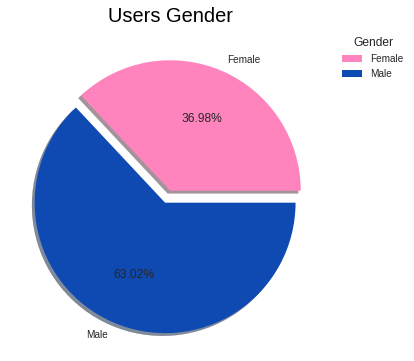

In [ ]:
#Fungsi
gender = df_t_user.groupby(['user_gender'])['user_id'].nunique()
#Pie chart
explode = (0, 0.1)
labels = ['Female', 'Male']
plt.figure(figsize=(6,6))
plt.pie(gender, labels = labels, autopct='%1.2f%%', shadow=True, explode = explode, colors = ('#FF84BE', '#0F4AB3'))
plt.title('Users Gender', loc='center', fontsize=20, color='black')
plt.legend(bbox_to_anchor=(1,1), shadow = True, title = 'Gender')
plt.show()

### **Age**

In [ ]:
age_col = ['user_id', 'user_age','user_gender']
user_byagegender = df_t_user[age_col].reset_index()
user_byagegender

,index,user_id,user_age,user_gender
0,0,50701,28.0,Female
1,1,50701,28.0,Female
2,2,50701,28.0,Female
3,3,50701,28.0,Female
4,4,50701,28.0,Female
...,...,...,...,...
151536,158806,4165020,24.0,Male
151537,158807,4165132,18.0,Male
151538,158808,4165630,28.0,Female
151539,158809,4165704,25.0,Male


In [ ]:
user_byagegender.drop_duplicates(subset='user_id', inplace= True)
user_byagegender['user_age'].value_counts()

21.0    693
20.0    614
23.0    554
22.0    549
24.0    514
19.0    503
25.0    458
18.0    443
26.0    419
27.0    362
28.0    350
29.0    328
30.0    254
31.0    229
32.0    190
35.0    163
33.0    161
34.0    140
36.0    135
17.0    134
37.0    107
42.0     94
38.0     88
40.0     76
39.0     75
41.0     70
43.0     56
44.0     55
46.0     49
45.0     41
Name: user_age, dtype: int64

In [ ]:
age_bygender = df_t_user.groupby(['user_age','user_gender'])['user_id'].nunique().reset_index()
age_bygender

,user_age,user_gender,user_id
0,17.0,Female,33
1,17.0,Male,101
2,18.0,Female,102
3,18.0,Male,341
4,19.0,Female,157
5,19.0,Male,346
6,20.0,Female,201
7,20.0,Male,413
8,21.0,Female,267
9,21.0,Male,426


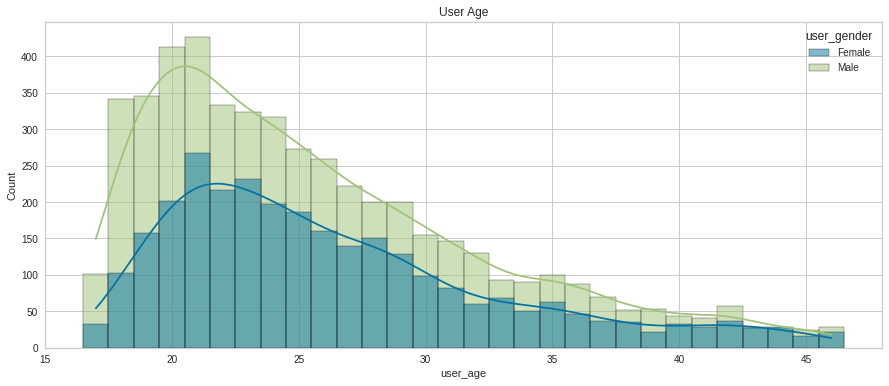

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data = user_byagegender,  kde = True, x= 'user_age', hue = 'user_gender', color = 'purple', bins=10, discrete=True)
plt.title('User Age')
plt.show()

###**Occupation**

In [ ]:
occupation = df_t_user.groupby('user_occupation')['user_id'].nunique().reset_index()
occupation

,user_occupation,user_id
0,Guru,49
1,IRT,380
2,Others,898
3,PNS,89
4,Pelajar,4473
5,Pengusaha,292
6,Swasta,1700
7,TNI/Polisi,23


In [ ]:
occ = ['user_id', 'user_occupation']
user_occ = df_t_user[occ]
user_occ.head (5)

,user_id,user_occupation
0,50701,IRT
1,50701,IRT
2,50701,IRT
3,50701,IRT
4,50701,IRT


In [ ]:
user_occ.drop_duplicates(subset='user_id', inplace= True)
user_occ['user_occupation'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Pelajar       4473
Swasta        1700
Others         898
IRT            380
Pengusaha      292
PNS             89
Guru            49
TNI/Polisi      23
Name: user_occupation, dtype: int64

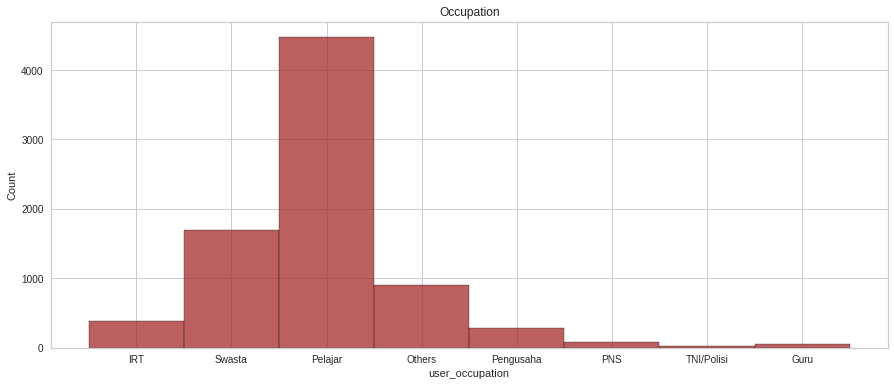

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data = user_occ,x= 'user_occupation', color = 'Brown', bins=10, discrete=True)
plt.title('Occupation')
plt.show()

###**Income Range**

In [ ]:
range = ['user_id','user_income_range']
income_range = df_t_user[range]
income_range.duplicated().sum()

143637

In [ ]:
income_range.drop_duplicates(subset='user_id', inplace= True)
income_range['user_income_range'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


< 10 Juta                   3455
Rp 10 Juta - 50 Juta        2594
> Rp 50 Juta - 100 Juta     1255
> Rp 100 Juta - 500 Juta     548
> Rp 500 Juta - 1 Miliar      39
> Rp 1 Miliar                 13
Name: user_income_range, dtype: int64

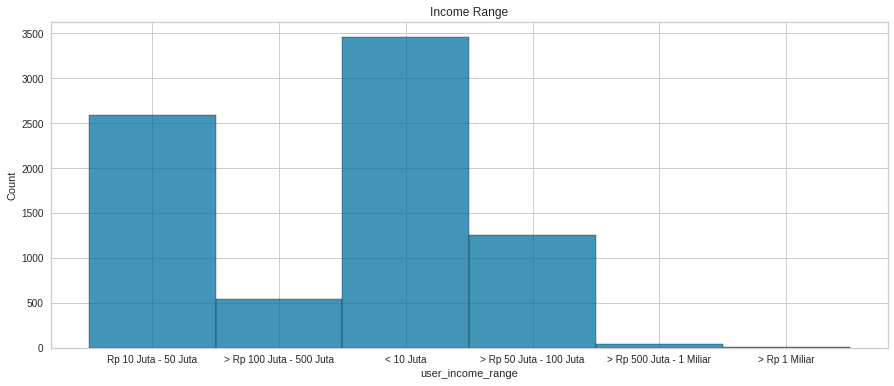

In [ ]:
plt.figure(figsize = (15,6))
sns.color_palette("tab10")
sns.histplot(data = income_range,x= 'user_income_range', bins=10, discrete=True)
plt.title('Income Range')
plt.show()

###**Source of Income**

In [ ]:
source = ['user_id','user_income_source' ]
in_source = df_t_user[source]
in_source

,user_id,user_income_source
0,50701,Gaji
1,50701,Gaji
2,50701,Gaji
3,50701,Gaji
4,50701,Gaji
...,...,...
158806,4165020,Keuntungan Bisnis
158807,4165132,Tabungan
158808,4165630,Dari Suami / istri
158809,4165704,Gaji


In [ ]:
in_source.duplicated().sum()

143637

In [ ]:
in_source.drop_duplicates(subset='user_id', inplace= True)
in_source['user_income_source'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Gaji                     4931
Keuntungan Bisnis         928
Undian                    916
Dari Orang Tua / Anak     469
Tabungan                  244
Lainnya                   242
Hasil Investasi            85
Dari Suami / istri         57
Warisan                    21
Bunga Simpanan             11
Name: user_income_source, dtype: int64

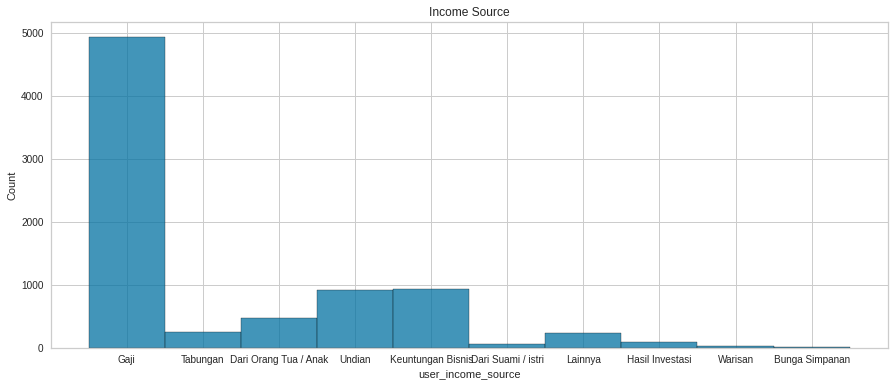

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data = in_source,x= 'user_income_source', bins=10, discrete=True)
plt.title('Income Source')
plt.show()

##**Average AUM per user**

In [ ]:
df_aum_av = df_daily.copy()
df_aum_av = df_aum_av[aum]

# create new data frame to get average of AUM per user
df_aum_av = df_aum_av.groupby(['user_id'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'].agg('mean').reset_index()
df_aum_av

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,user_id,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
0,1004326,91066.419355,2.003513e+04,90335.483871,0.0
1,1005053,152188.000000,1.000150e+04,39948.000000,0.0
2,1005165,9996.333333,2.002510e+04,70008.333333,0.0
3,1018814,0.000000,1.076219e+06,0.000000,0.0
4,1023627,100399.235294,0.000000e+00,0.000000,0.0
...,...,...,...,...,...
7899,988940,49814.416667,2.902002e+05,160128.583333,0.0
7900,989618,802144.866667,1.702496e+05,956814.300000,0.0
7901,990466,397633.625000,1.002176e+05,521930.541667,0.0
7902,99245,0.000000,5.005478e+05,500992.636364,0.0


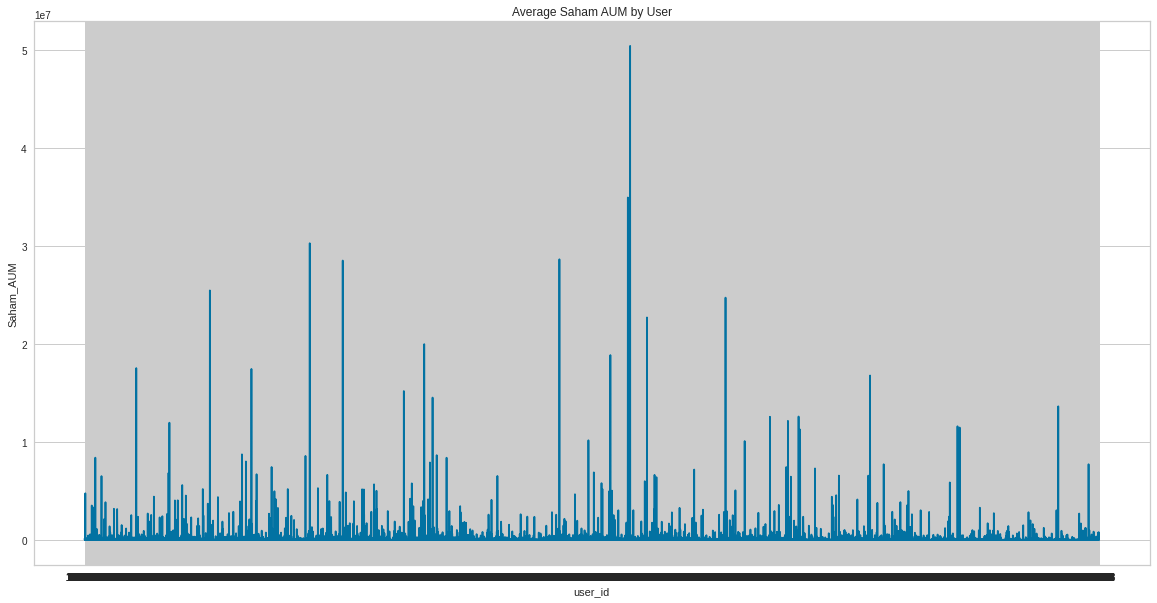

In [ ]:
#Average Saham AUM by User
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Average Saham AUM by User')

sns.lineplot(data=df_aum_av,x='user_id',y= 'Saham_AUM',ax=ax,palette='Set1')

plt.show()

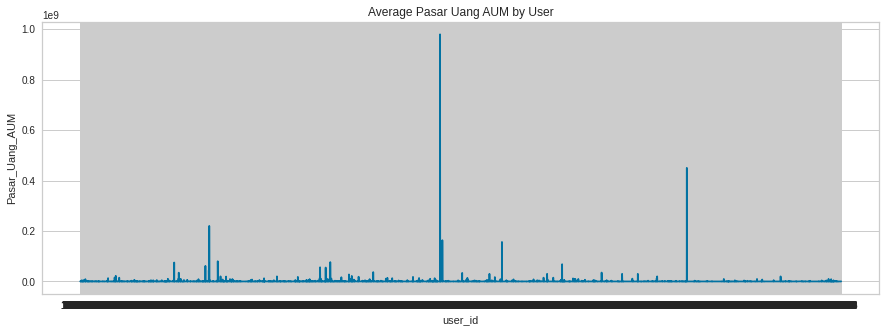

In [ ]:
#Average Pasar Uang AUM by User
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Average Pasar Uang AUM by User')

sns.lineplot(data=df_aum_av,x='user_id',y= 'Pasar_Uang_AUM',ax=ax,palette='Set1')

plt.show()

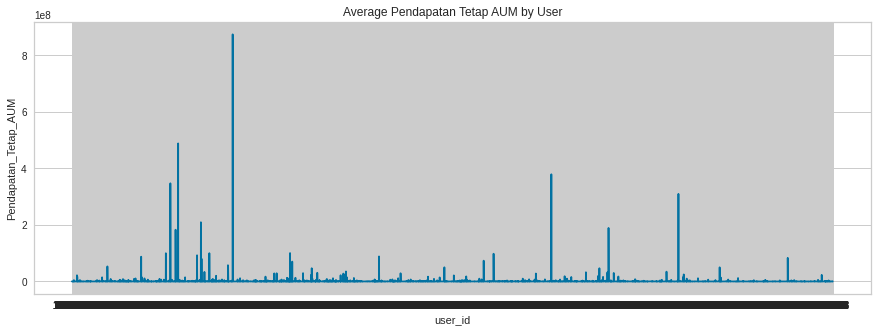

In [ ]:
#Average Pendapatan Tetap AUM by User
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Average Pendapatan Tetap AUM by User')

sns.lineplot(data=df_aum_av,x='user_id',y= 'Pendapatan_Tetap_AUM',ax=ax,palette='Set1')

plt.show()

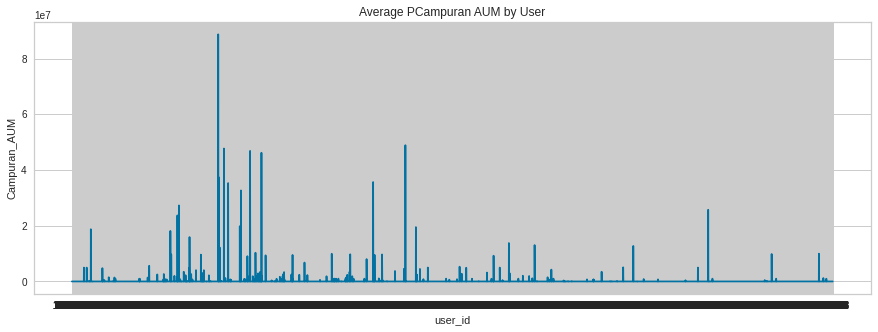

In [ ]:
#Average Campuran AUM by User
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Average PCampuran AUM by User')

sns.lineplot(data=df_aum_av,x='user_id',y= 'Campuran_AUM',ax=ax,palette='Set1')

plt.show()

## **number transaction per day**

In [ ]:
df_tx = df_daily.copy()
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           151541 non-null  object        
 1   registration_import_datetime      151541 non-null  datetime64[ns]
 2   user_gender                       151541 non-null  object        
 3   user_age                          151541 non-null  float64       
 4   user_occupation                   151541 non-null  object        
 5   user_income_range                 151541 non-null  object        
 6   referral_code_used                151541 non-null  object        
 7   user_income_source                151541 non-null  object        
 8   date_transaction                  151541 non-null  datetime64[ns]
 9   Saham_AUM                         151541 non-null  int64         
 10  Saham_invested_amount           

In [ ]:
# create new data frame
tx = ['date_transaction','saham_frequency','pu_frequency','pt_frequency','campur_frequency']
df_tx = df_tx [tx]
df_tx.head()

,date_transaction,saham_frequency,pu_frequency,pt_frequency,campur_frequency
0,2021-08-30,0,0,0,0
1,2021-08-31,0,0,0,0
2,2021-09-01,0,0,0,0
3,2021-09-02,0,0,0,0
4,2021-09-03,0,0,0,0


In [ ]:
#groupy for daily
tx_freq = df_tx.groupby(['date_transaction'])['saham_frequency','pu_frequency','pt_frequency','campur_frequency'].agg('sum')
tx_freq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,saham_frequency,pu_frequency,pt_frequency,campur_frequency
date_transaction,,,,
2021-08-04,0,0,0,0
2021-08-05,5,8,3,0
2021-08-06,13,18,21,0
2021-08-09,27,27,32,2
2021-08-10,29,35,31,0
2021-08-11,44,58,49,2
2021-08-12,18,19,12,0
2021-08-13,36,55,44,2
2021-08-16,59,89,95,4


In [ ]:
frequency = pd.merge(df_tx,tx_freq, on='date_transaction', how = 'right', indicator = True)
frequency.duplicated().sum()
frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_transaction    151541 non-null  datetime64[ns]
 1   saham_frequency_x   151541 non-null  int64         
 2   pu_frequency_x      151541 non-null  int64         
 3   pt_frequency_x      151541 non-null  int64         
 4   campur_frequency_x  151541 non-null  int64         
 5   saham_frequency_y   151541 non-null  int64         
 6   pu_frequency_y      151541 non-null  int64         
 7   pt_frequency_y      151541 non-null  int64         
 8   campur_frequency_y  151541 non-null  int64         
 9   _merge              151541 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(8)
memory usage: 11.7 MB


In [ ]:
frequency.drop(columns= ['saham_frequency_x', 'pu_frequency_x', 'pt_frequency_x', 'campur_frequency_x', '_merge'], inplace=True)
frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_transaction    151541 non-null  datetime64[ns]
 1   saham_frequency_y   151541 non-null  int64         
 2   pu_frequency_y      151541 non-null  int64         
 3   pt_frequency_y      151541 non-null  int64         
 4   campur_frequency_y  151541 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 6.9 MB


In [ ]:
frequency.drop_duplicates(inplace=True)
frequency

,date_transaction,saham_frequency_y,pu_frequency_y,pt_frequency_y,campur_frequency_y
0,2021-08-04,0,0,0,0
111,2021-08-05,5,8,3,0
303,2021-08-06,13,18,21,0
600,2021-08-09,27,27,32,2
1001,2021-08-10,29,35,31,0
1547,2021-08-11,44,58,49,2
2486,2021-08-12,18,19,12,0
3425,2021-08-13,36,55,44,2
4484,2021-08-16,59,89,95,4
5771,2021-08-17,37,47,40,1


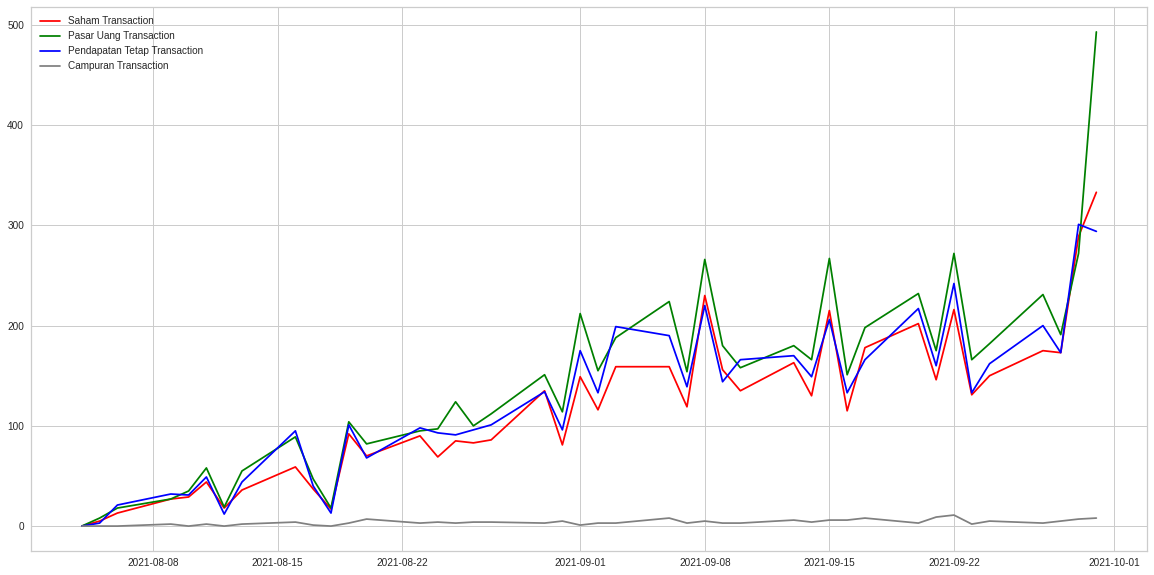

In [ ]:
plt.figure(figsize = (20,10))

x_tx_freq = frequency['date_transaction']
a_tx_freq = frequency['saham_frequency_y']
b_tx_freq = frequency['pu_frequency_y']
c_tx_freq = frequency['pt_frequency_y']
d_tx_freq = frequency['campur_frequency_y']

plt.plot(x_tx_freq, a_tx_freq, label = 'Saham Transaction', linestyle="-", color='red')
plt.plot(x_tx_freq, b_tx_freq, label = 'Pasar Uang Transaction', linestyle="-", color='green')
plt.plot(x_tx_freq, c_tx_freq, label = 'Pendapatan Tetap Transaction', linestyle="-", color='blue')
plt.plot(x_tx_freq, d_tx_freq, label = 'Campuran Transaction', linestyle="-", color='grey')
plt.legend()
plt.show()

In [ ]:
#we can see in the diagram that number of user do transaction daily increase in each day